# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


## Correlation

In [3]:
corr_mat = data.corr()
corr_mat

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

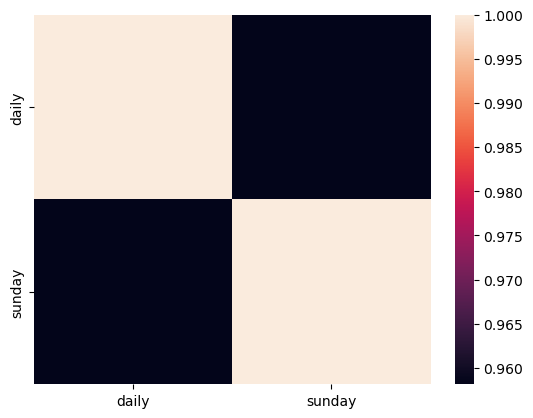

In [5]:
sns.heatmap(corr_mat)

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


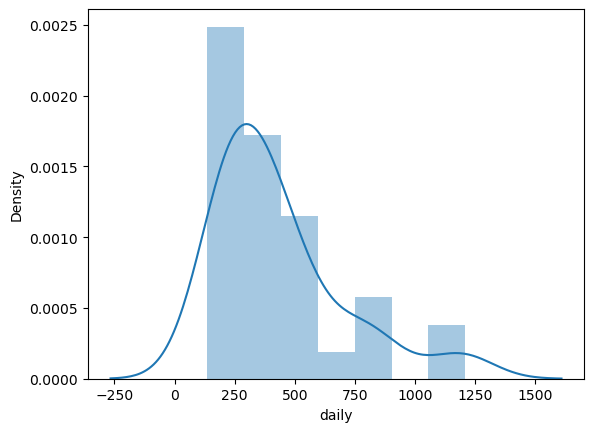

In [7]:
# distribution of daily newspapers
sns.distplot(data['daily']);

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


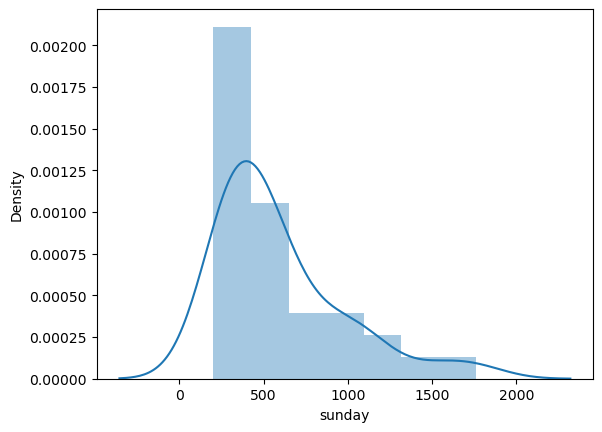

In [9]:
# distribution of news papers on sunday
sns.distplot(data['sunday']);

## Fitting a linear regression model (OLS)

In [11]:
import statsmodels.formula.api as smf

In [39]:
# creating an instance of the model
model = smf.ols("sunday~daily", data = data)
# fitting the model
model.fit()

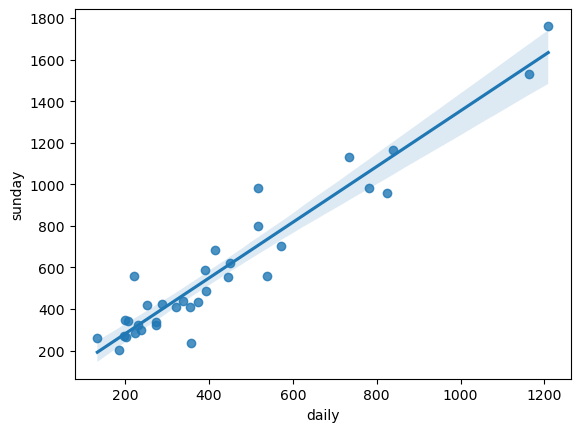

In [19]:
# creating a regression plot
sns.regplot(data=data, x='daily', y='sunday');

In [20]:
# Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [22]:
print("Intercept -> beta-0 : ", model.params[0])
print("Slope -> beta-1 : ", model.params[1])

Intercept -> beta-0 :  13.835629909636197
Slope -> beta-1 :  1.3397147576841255


In [27]:
# t and p-values
print(model.tvalues, "\n",  model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [30]:
print("t value for beta0 : ", model.tvalues[0])
print("t value for beta1 : ", model.tvalues[1])

t value for beta0 :  0.3864268705156813
t value for beta1 :  18.934840279518063


In [31]:
print("p-value for beta0 : ", model.pvalues[0])
print("p-value for beta1 : ", model.pvalues[1])

p-value for beta0 :  0.701738178585348
p-value for beta1 :  6.016802409084798e-19


In [38]:
# R squared values
model.rsquared

0.9180596895873294

In [42]:
# creating a summary table for OLS model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           6.02e-19
Time:                        12:07:58   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict for new data point

In [33]:
# Predict for 200 and 300 daily circulation
newdata = pd.Series([200, 300])

In [34]:
data_pred = pd.DataFrame(newdata, columns=['daily'])

In [35]:
data_pred

,daily
0,200
1,300


In [36]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64